In [12]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

from generators import StyleTransferGenerator
from cycle_gan import CycleGAN


In [13]:
params_json = {
    "run_folder": "c:\\Users\\1\\Desktop\\models_save\\TEST_CycleGAN",
    "input_shape": (128, 128, 3),
    "discriminator_params": {
        "filters_n": 32,
        "layers_n": 3,
        "last_activation": "sigmoid" 
    },

    "generator_params": {
        "filters_n": 32,
        "down_activation": "tanh",
        "up_activation": "tanh",
        "last_activation": "tanh"
    }
}

In [14]:
cycle_gan = CycleGAN(params_json=params_json)

In [15]:
print(cycle_gan.discriminator_A.summary())

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 64, 64, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_22                │ (None, 64, 64, 32)     │            65 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 32, 32, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_23                │ (None, 32, 32, 32)     │            65 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 16, 16, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_24                │ (None, 16, 16, 64)     │           129 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 16, 16, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_25                │ (None, 16, 16, 128)    │           257 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 16, 16, 1)      │         2,049 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 16, 16, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,581 (721.04 KB)

 Trainable params: 184,065 (719.00 KB)

 Non-trainable params: 516 (2.03 KB)

None


In [16]:
print(cycle_gan.generator_A.summary())

Model: "functional_15"

KeyboardInterrupt: 

In [6]:
generator = StyleTransferGenerator(data_path="c:\\Users\\1\\Desktop\\data_files\\style_transfer_dataset", batch_size=32, target_size=(128, 128))

In [7]:
data = []
for (batch_number, data_batch) in enumerate(iter(generator)):

    if batch_number == 30:
        break

    data.append(data_batch)    

In [8]:
images = np.concatenate([samples[0] for samples in data], axis=0)
styles = np.concatenate([samples[1] for samples in data], axis=0)
# images = images / 255.0
# styles = styles / 255.0

In [9]:
images_std = (images - np.mean(images)) / np.std(images)
styles_std = (styles - np.mean(styles)) / np.std(styles)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


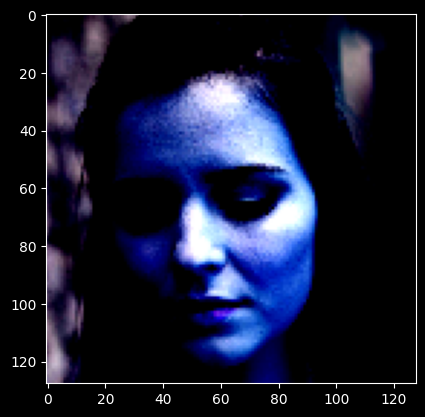

In [10]:
plt.style.use("dark_background")
fig, axis = plt.subplots()
axis.imshow(images_std[np.random.randint(0, 100)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


KeyboardInterrupt: 

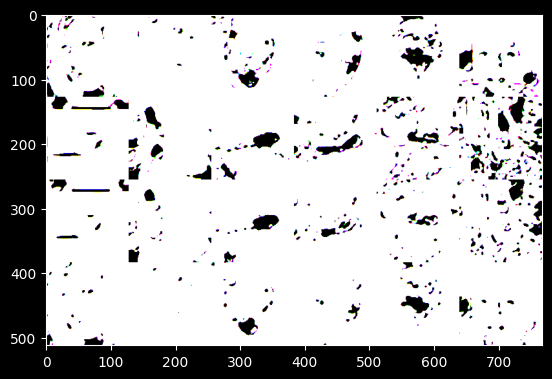

In [11]:
cycle_gan.train_model(images_A=images_std, images_B=styles_std, batch_size=32, epochs=100, epochs_per_save=10)